# Прогнозирование закономерностей успешности игр для интернет-магазина

**Описание проекта:**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Даны данные до 2016 года. По условию проекта, сейча декабрь 2016 г., и планируется кампания на 2017-й. 

**Задача проекта:**

Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Проведем исследование по следующему плану:**

* обзор данных
* подготовка данных
* исследовательякий анализ данных
* портрет пользователя по регионам
* проверка гипотез
* общий вывод

## Обзор данных

In [1]:
# импортируем нужные нам в проекте библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Вывод:**

Необходимо разобраться со следующими моментами:
- изменить названия колонок
- изменить тип данных по столбцам, где это необходимо  
- проверить значение tbd в `User_Score`
- заполнить пропуски

## Подготовка данных

In [5]:
# приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

По столбцу `year_of_release` имеются пропуски, поэтому пока не можем поменять тип данных на целочисленный.

In [6]:
# проверим сколько данных будет потеряно, при удалении пустых строк
print('Объем удаленных даных {0:.2%}'.format(df[df.year_of_release.isna()].shape[0]/df.shape[0]))

Объем удаленных даных 1.61%


In [7]:
# на выходе останется достаточно большой объем данных, поэтому смело удаляем пустые строки
df.dropna(subset=['year_of_release'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int')

В столбце `genre` имеются 2 пропуска, взглянем на них

In [8]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# видим минимальное количество информации, можем также удалять
df.dropna(subset=['genre'], inplace=True)

В столбце `user_score` содержится значения tbd. **TBD** - это аббревеатура от `to be determined` - переводится как "Будет определено". Будем считать эти значения пропущенными, поэтому их стоит заменить на NaN.

In [10]:
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропущенные значения в столбцах `critic_score` и `user_score` являются субьективными оценками критиков и пользователей, поэтому заполнять будет некорректно. Оставим как есть.

In [11]:
# посмотрим на значения по столбцу rating
df.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Изучим информацию о ESRB (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board).
Имеются актуальных 7 категорий. 

* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам» Игра подходит для лиц от 13 лет.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* «RP» («Rating Pending») — «Рейтинг ожидается»:

K-A for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E

Исходя из прочитанного, становится ясно, что рейтинг ESRB изначально был создан для игровой индустрии США и Канады. 
Поэтому можно предположить, что наличие пропусков обусловленно просто отсутвием рейтинга для игр.
Помимо этого нельзя отвергать варианты человеческого фактора, такие как невнимательность. А возможно кто-то нарочно не указал информацию!

Внесем изменения в наш датафрейм на основании информации выше.

In [12]:
# заменим категорию `K-A` на `E`
df.loc[df['rating']=='K-A','rating'] = 'E'
# категорию `EC` на `E`
df.loc[df['rating']=='EC','rating'] = 'E'
# а категорию `AO` на `M`
df.loc[df['rating']=='AO','rating'] = 'M'

# пропущенные значения заполним `RP`, как `рейтинг неопределен`
df.loc[df.loc[:,'rating'].isnull(),'rating'] = 'RP'

df.rating.value_counts()

RP      6677
E       3932
T       2905
M       1537
E10+    1393
Name: rating, dtype: int64

In [13]:
# проверим наличие дубликатов
df.duplicated().sum()

0

In [14]:
# посчитаем суммарные продажи во всех регионах
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

# посмотрим, что в итоге имеем
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


**Вывод:**

Что было сделано в этом блоке:
* названия колонок приведены к единому регистру - нижнему 
* удалены пустые строки в столбцах `year_of_release` и `genre`
* расшифровано значение абривеатуры **TBD** в столбце `user_score`, при этом значения заменены на **NaN**
* заменены значения категории `K-A` и `EC` на `E` в столбце `rating`, а значения категории `AO` на `M`; пропущенные значения заполнены `RP`, как рейтинг неопределен
* добавлен столбец `total_sales` с суммами продажи во всех регионах

## Исследовательский анализ данных

### Количество выпущенных игр в разные годы

In [15]:
# посмотрим сколько игр выпускалось в разные годы
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

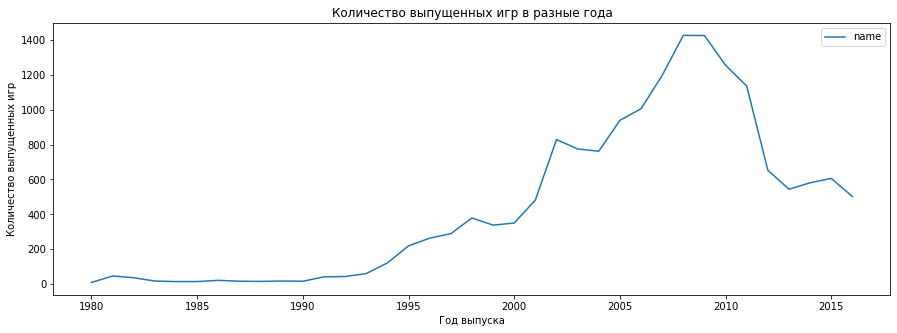

In [16]:
# построим график выпуска игр по годам
total_games_for_all_time = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15,5))
sns.lineplot(data=total_games_for_all_time)
plt.title("Количество выпущенных игр в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

По графику видно, что:
* после 1995 года начался буйный рост выпуска игр, в связи с развитием игровой индустрии на консолях и персональных компьютерах
* с 2008 года начался спад, скорее всего связано с переносом акцента на мобильные платформы

### Посмотрим, как менялись продажи по платформам

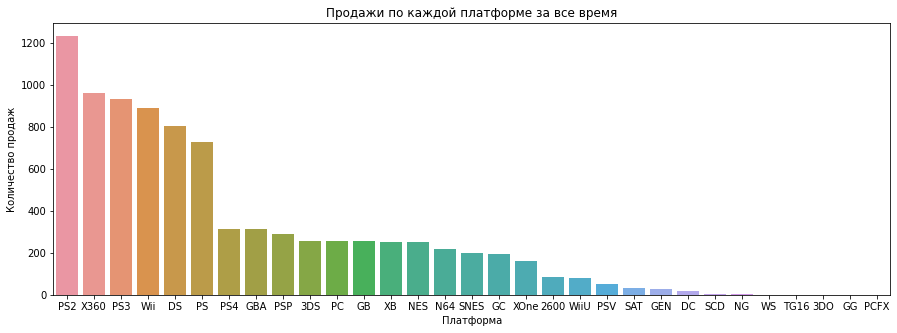

In [17]:
# подготовим сводную таблицу с суммарными продажами по всем платформам за все время и построим график
sales_on_platform = df.pivot_table(index='platform', 
                                   values='total_sales', 
                                   aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title('Продажи по каждой платформе за все время')
plt.ylabel('Количество продаж')
plt.xlabel('Платформа')
plt.show()

In [18]:
# выберем платформы с наибольшими суммарными продажами 
top_10_platforms = df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', 
                                                                                ascending = False)[:10].index

In [19]:
# подготовим сводную таблицу сумаррных продаж по платформам и годам
life_platforms = df.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')
life_platforms['years'] = life_platforms.index.tolist()
life_platforms['years'] = life_platforms['years'].apply (lambda row: row[1]).astype('int')
life_platforms

total_sales  years
platform year_of_release                    
2600     1980                   11.38   1980
         1981                   35.68   1981
         1982                   28.88   1982
         1983                    5.84   1983
         1984                    0.27   1984
...                               ...    ...
XB       2008                    0.18   2008
XOne     2013                   18.96   2013
         2014                   54.07   2014
         2015                   60.14   2015
         2016                   26.15   2016

[238 rows x 2 columns]

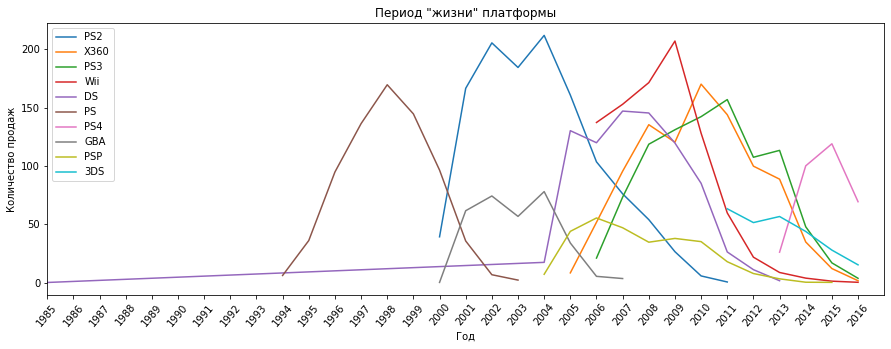

In [20]:
# отрисуем график периода "жизни" платформ
fig, ax = plt.subplots(figsize =(15,5))
for platform in top_10_platforms:
    life_platforms.loc[platform].plot('years','total_sales',rot=50, ax=ax)
ax.legend(top_10_platforms,prop = {'size':10})
ax.set_xlim([1985,2017])
ax.set_xticks(np.arange(1985,2017))
ax.set_xticklabels(range(1985,2017))
plt.title('Период "жизни" платформы')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

* По графику видно, что платформы живут в среднем 10-11 лет.
* Появляются новые платформы в интервале от 1 до 5 лет.

### Возьмем данные за соответствующий актуальный период

Для дальнейшего анализа выберем данные за последние несколько лет, т.к. они отражают последние тенденции и на их основании можно сделать прогноз на 2017 год.

Актуальным периодом будем считать 2014 - 2016 года.

In [21]:
actual_period = df.query('(year_of_release >= 2014)')
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98


In [22]:
# сгруппируем данные
platform_pivot = actual_period.pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], aggfunc=['sum'])
platform_pivot = platform_pivot.reset_index(level='year_of_release')
platform_pivot.columns = ['year_of_release', 'total_sales']
platform_pivot = platform_pivot.reset_index()
platform_pivot = platform_pivot.pivot(index='year_of_release', columns='platform', values='total_sales')

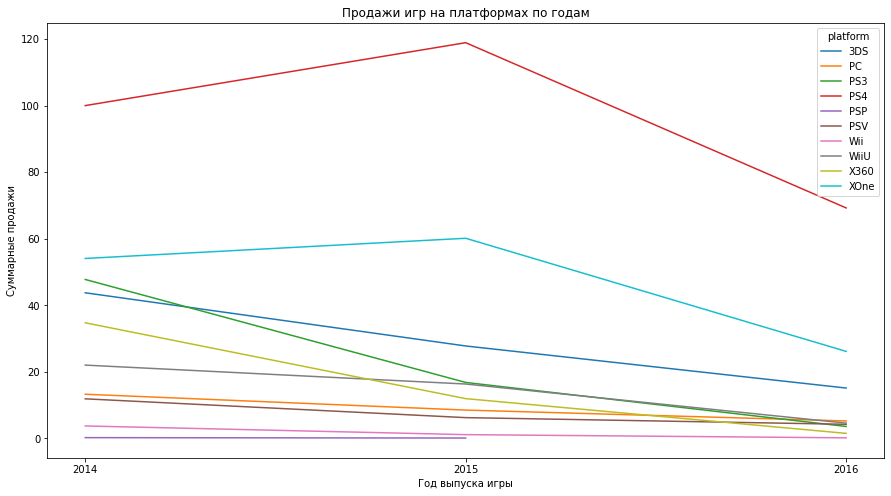

In [23]:
# построим график
fig, ax = plt.subplots()
platform_pivot.plot(figsize=(15,8), ax=ax)
plt.title('Продажи игр на платформах по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Суммарные продажи')
plt.xticks([2014, 2015, 2016])
plt.show()

In [24]:
# посмотрим общую прибыль и выведем из них 3 наиболее перспективные платформы
top_selling_platforms = actual_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
top_selling_platforms.head(3)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

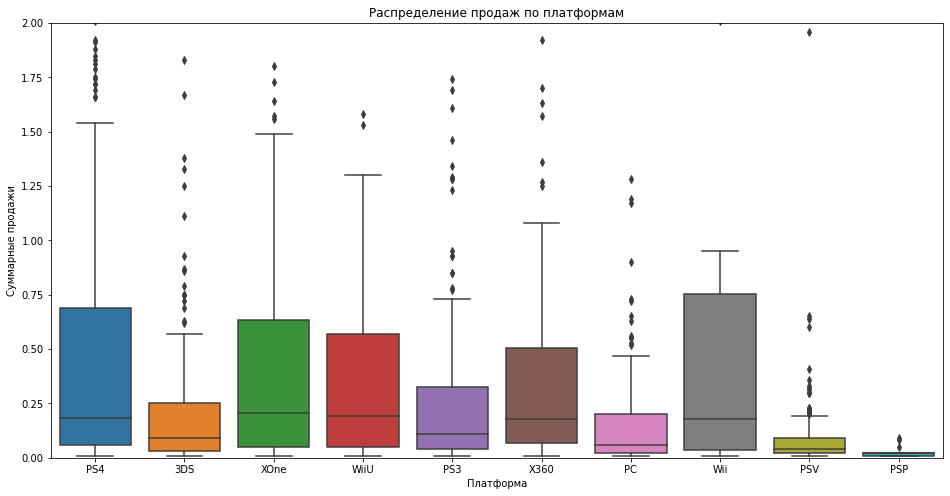

In [25]:
fig, ax = plt.subplots(figsize =(16,8))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = actual_period,ax=ax)  
plt.ylim(0, 2)
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

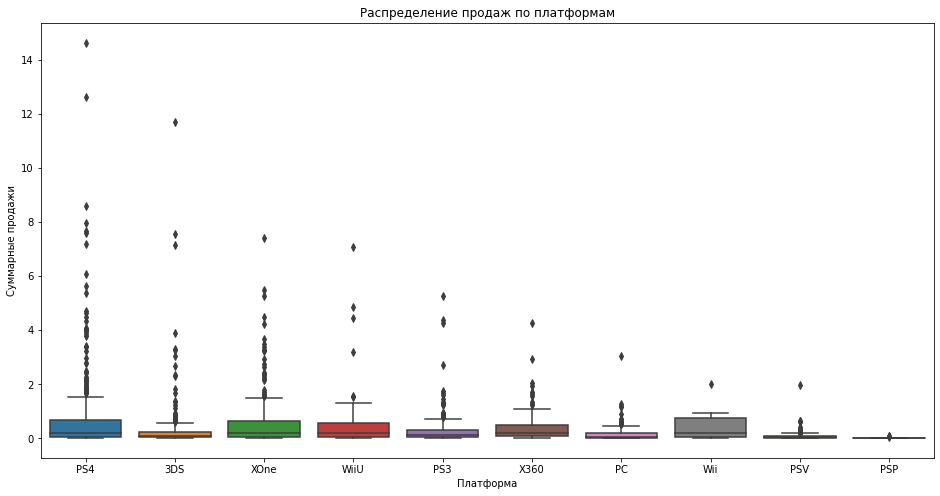

In [26]:
fig, ax = plt.subplots(figsize =(16,8))
sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = actual_period,ax=ax)  
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

Хоть мы и имеем неполные данные за 2016 год, можно сказать, что:
* Продажи по всем платформам падают со временем. 
* PS4 и XOne до 2015 показывали рост продаж.
* Наиболее пепрспективными платформами отчасти можно считать PS4, XOne, 3DS. Так как они сохраняют достаточно высокий уровень продаж.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

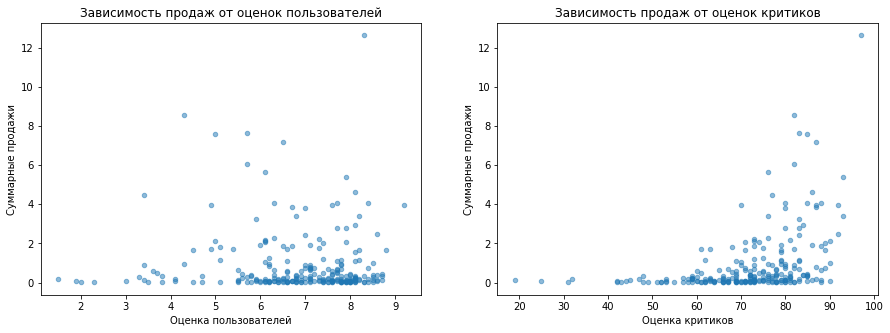

In [27]:
# возьмем за основу данные по Play Station 4
df_ps4 = actual_period.query('platform == "PS4"')

# построим диаграммы рассеяния
fig, ax = plt.subplots(1, 2)
df_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ax=ax[0], figsize=(15,5))
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ax=ax[1], figsize=(15,5))

ax[0].set_title('Зависимость продаж от оценок пользователей')
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Суммарные продажи')
ax[1].set_title('Зависимость продаж от оценок критиков')
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Суммарные продажи')
plt.show()

In [28]:
# посчитаем корреляцию между отзывами и продажами
df_ps4[['user_score', 'critic_score', 'total_sales']].corr().round(2)

,user_score,critic_score,total_sales
user_score,1.00,0.55,-0.04
critic_score,0.55,1.00,0.40
total_sales,-0.04,0.40,1.00


* Для оценок пользователей Коэффициент Пирсона равен -0.04, ни о какой зависимости речи и не может идти.
* Для оценок критиков Коэффициент Пирсона равен 0.4. Что оказывает довольно приличное влияние на продажи. 

Теперь рассмотрим 2 другие платформы.

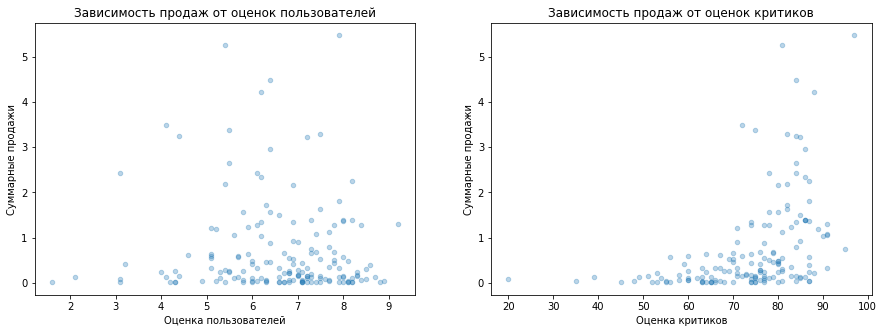

In [29]:
# рассмотрим платформу Xbox One
df_xone = actual_period.query('platform == "XOne"')

# построим диаграмму рассеяния
fig, ax = plt.subplots(1, 2)
df_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, ax=ax[0], figsize=(15,5))
df_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, ax=ax[1], figsize=(15,5))

ax[0].set_title('Зависимость продаж от оценок пользователей')
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Суммарные продажи')
ax[1].set_title('Зависимость продаж от оценок критиков')
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Суммарные продажи')
plt.show()

In [30]:
# посчитаем корреляцию между отзывами и продажами
df_xone[['user_score', 'critic_score', 'total_sales']].corr().round(2)

,user_score,critic_score,total_sales
user_score,1.00,0.44,-0.07
critic_score,0.44,1.00,0.43
total_sales,-0.07,0.43,1.00


По платформе Xbox One ситуация аналогична:
* Для оценок пользователей Коэффициент Пирсона равен -0.07. Чуть лучше, но по-премжнему  зависимости между продажами и оценками пользователей нет.
* Для оценок критиков Коэффициент Пирсона равен 0.43. Зависимость продаж сохраняется от оценок критиков.

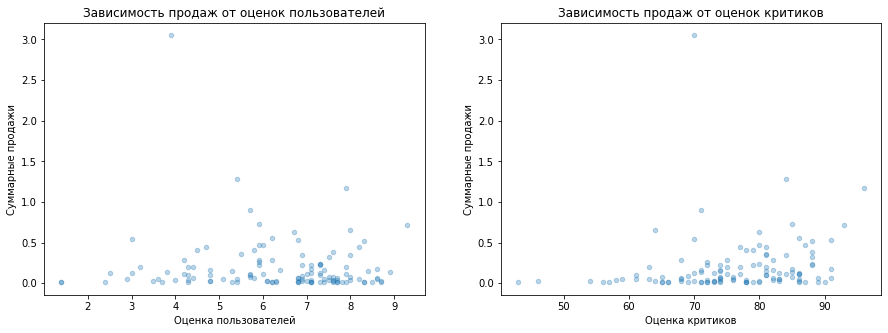

In [31]:
# рассмотрим персональные компьютеры
df_pc = actual_period.query('platform == "PC"')

# построим диаграмму рассеяния
fig, ax = plt.subplots(1, 2)
df_pc.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, ax=ax[0], figsize=(15,5))
df_pc.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, ax=ax[1], figsize=(15,5))

ax[0].set_title('Зависимость продаж от оценок пользователей')
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Суммарные продажи')
ax[1].set_title('Зависимость продаж от оценок критиков')
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Суммарные продажи')
plt.show()

In [32]:
# посчитаем корреляцию между отзывами и продажами
df_pc[['user_score', 'critic_score', 'total_sales']].corr().round(2)

,user_score,critic_score,total_sales
user_score,1.00,0.47,-0.07
critic_score,0.47,1.00,0.17
total_sales,-0.07,0.17,1.00


По персональному компьютеру все немного иначе:
* Для оценок пользователей Коэффициент Пирсона все также равен -0.07. Зависимости между продажами и оценками пользователей нет.
* Для оценок критиков Коэффициент Пирсона равен 0.17. Зависимости между продажами и оценками критиков также нет.

**Соотнесем выводы по продажами игр**:
* Для оценок пользователей Коэффициент Пирсона во всех трех случаях оказался примерно одинаковым  -0.07. Зависимости между продажами и оценками пользователей нет.
* А вот для оценок критиков Коэффициент ситуации отличаются. В отличии от PS4 и Xone, где показатели равны 0.4 и 0.43, что означает умеренную зависимость продаж от оценок критиков. То в ситуации с  персональном компьютером, Коэффициент Пирсона равен 0.17, значит зависимости между продажами и оценками критиков нет.

### Посмотрим на общее распределение игр по жанрам

In [33]:
# посмотрим на распределение количества игр по жанрам 
actual_period.groupby('genre')['genre'].count().sort_values(ascending = False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [34]:
# посмотрим как распределены продажи по жанрам игр
# возьмем среднее значение
total_sales_genre = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
total_sales_genre

,genre,total_sales
0,Shooter,1.335469
1,Sports,0.680000
2,Platform,0.476053
3,Fighting,0.470333
4,Role-Playing,0.459005
5,Racing,0.398841
6,Misc,0.332301
7,Action,0.322068
8,Simulation,0.298409
9,Puzzle,0.157857


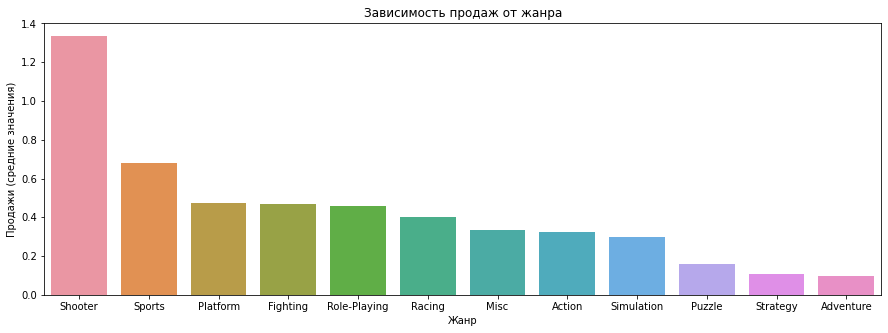

In [35]:
# построим барплот для наглядности
plt.figure(figsize=(15,5))
sns.barplot(x=total_sales_genre['genre'],
            y=total_sales_genre['total_sales'])
plt.title("Зависимость продаж от жанра")
plt.xlabel("Жанр")
plt.ylabel("Продажи (средние значения)")
plt.show()

Вырисовывается интересная картина: 
* В топ-3 вырвались жанры `Shooter`, `Sports` и `Platform` c перовначальных 5, 4 и 10 позиций, соответсвенно.
* В аутсайдерах на 11 месте как был `Strategy` так и осатлся. А вот `Adventure` с 3 позиции улетел аж на 12. Вот так поворот!

Тот самый момент, когда качество оказывается выгоднее количества.

##  Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [36]:
# посмотрим на продажи в регионах по платформам
df_platform_sales = actual_period.pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
df_platform_sales = df_platform_sales.reset_index()
df_platform_sales

,platform,eu_sales,jp_sales,na_sales
0,3DS,16.12,44.24,22.64
1,PC,17.97,0.00,7.23
2,PS3,25.54,11.22,22.05
3,PS4,130.04,15.02,98.61
4,PSP,0.00,0.36,0.00
5,PSV,3.53,14.54,2.52
6,Wii,2.59,0.00,2.08
7,WiiU,13.15,7.31,19.36
8,X360,15.49,0.08,28.30
9,XOne,46.25,0.32,81.27


In [37]:
# создадим словарь, куда поместим список продаж с топ-5 платформами в трех регионах
top5_platform_dict = {}
regions = ['na_sales', 'eu_sales', 'jp_sales']

for value in regions:
    top5_platform_dict[value] = df_platform_sales.groupby('platform')[value].sum().sort_values(ascending=False).head(5)
    
top5_platform_dict

{'na_sales': platform
 PS4     98.61
 XOne    81.27
 X360    28.30
 3DS     22.64
 PS3     22.05
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     130.04
 XOne     46.25
 PS3      25.54
 PC       17.97
 3DS      16.12
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     44.24
 PS4     15.02
 PSV     14.54
 PS3     11.22
 WiiU     7.31
 Name: jp_sales, dtype: float64}

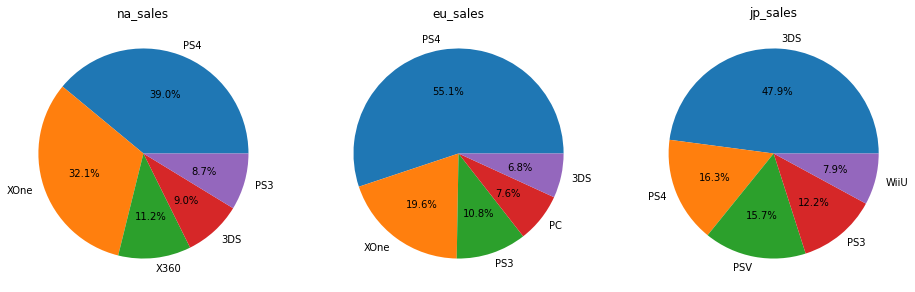

In [38]:
# отобразим полученные результаты на графике
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
x = [ax1, ax2, ax3]

for i in [0,1,2]:
    labels = top5_platform_dict[regions[i]].index
    sizes = top5_platform_dict[regions[i]].values
    ax = x[i]
    ax.set_title(regions[i])
    ax.pie(sizes, labels=labels, autopct='%1.1f%%') 
    
plt.show()

Топ платформ по регионам распределился в следующем порядке (по убыванию):

* Северная Америка - `PS4`, `XOne`, `X360`, `3DS`, `PS3`
* Европа - `PS4`, `XOne`, `PS3`, `PC`, `3DS`
* Япония - `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`

На удивление в Северной Америке `Play Station 4` оказалась более популярной, нежели `XBox One`, хотя нужно признать что разрыв не такой уж и большой.

В Европе также на первом месте `Play Station 4`, заметно меньшей популярностью пользуется `XBox One`. В отличии от Северной Америки и Японии, в Европе не брезгуют играми на персональном компьютере. 

В Японии наибольшее предпочтение отдано портативной приставке `Nintendo 3DS`. А вот `XBox`- у места не нашлось. Что-то мне подсказывает, что техника из США здесь не пользуется большим спросом.

### Самые популярные жанры (топ-5)

In [39]:
# теперь посмотрим на продажи в регионах по жанрам
df_genre_sales = actual_period.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
df_genre_sales = df_genre_sales.reset_index()
df_genre_sales

,genre,eu_sales,jp_sales,na_sales
0,Action,74.68,29.58,72.53
1,Adventure,6.49,3.60,5.64
2,Fighting,6.69,6.37,12.43
3,Misc,12.86,5.61,15.05
4,Platform,6.80,2.69,6.79
5,Puzzle,0.52,0.93,0.65
6,Racing,14.13,1.76,8.74
7,Role-Playing,28.17,31.16,33.47
8,Shooter,65.52,4.87,79.02
9,Simulation,7.30,2.31,2.63


In [40]:
# аналогично, создаем словарь и поместим в него список продаж с топ-5 жанрами в трех регионах
top5_genre_dict = {}

for region in regions:
    top5_genre_dict[region] = df_genre_sales.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top5_genre_dict

{'na_sales': genre
 Shooter         79.02
 Action          72.53
 Sports          46.13
 Role-Playing    33.47
 Misc            15.05
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          74.68
 Shooter         65.52
 Sports          45.73
 Role-Playing    28.17
 Racing          14.13
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    31.16
 Action          29.58
 Fighting         6.37
 Misc             5.61
 Shooter          4.87
 Name: jp_sales, dtype: float64}

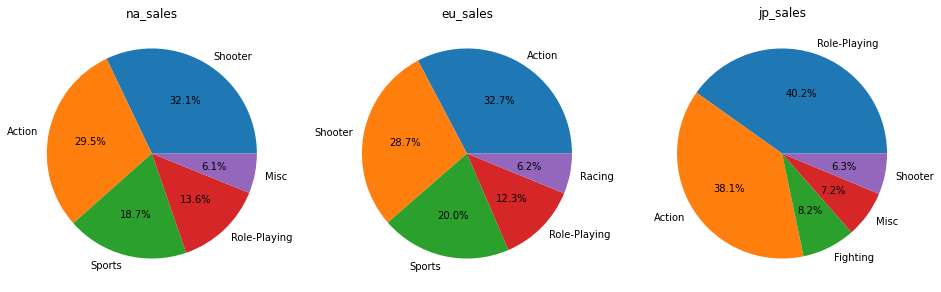

In [41]:
# строим график
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

x = [ax1, ax2, ax3]

for i in [0,1,2]:
    labels = top5_genre_dict[regions[i]].index
    sizes = top5_genre_dict[regions[i]].values
    ax = x[i]
    ax.set_title(regions[i])
    ax.pie(sizes, labels=labels, autopct='%1.1f%%') 

plt.show()

Топ жанров по регионам распределился в следующем порядке (по убыванию):

* Северная Америка - `Shooter`, `Action`, `Sports`, `Role_Playing`, `Misc`
* Европа - `Action`, `Shooter`, `Sports`, `Role_Playing`, `Racing`
* Япония - `Role_Playing`, `Action`, `Fighting`, `Misc`, `Shooter`

Игроки в Северной Америке и Европе удивительным образом похожи, в плане выбора игрового жанра. Правда в Америке игроки немного больше любят пострелять, нежели европейцы. Одинаково распространены спортивные игры и ролевые игры. 

В Японии совсем иная ситуцация - здесь "без ума" от ролевых игр и экшена. Думаю это связано с местным менталитетом и культурой, потому как шутеры практически не интересуют японских игроков.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [42]:
# построим сводную таблицу по рейтингу ESRB по суммарным продажам
esrb_rating = actual_period.pivot_table(index='rating',
                                      values=['na_sales','eu_sales','jp_sales','total_sales'],
                                      aggfunc=sum).sort_values(by='total_sales', ascending=False).reset_index()

esrb_rating['na_sales_rating'] = (esrb_rating['na_sales']*100/esrb_rating['na_sales'].sum()).round(2)
esrb_rating['eu_sales_rating'] = (esrb_rating['eu_sales']*100/esrb_rating['eu_sales'].sum()).round(2)
esrb_rating['jp_sales_rating'] = (esrb_rating['jp_sales']*100/esrb_rating['jp_sales'].sum()).round(2)
esrb_rating

,rating,eu_sales,jp_sales,na_sales,total_sales,na_sales_rating,eu_sales_rating,jp_sales_rating
0,M,93.44,8.01,96.42,226.54,33.94,34.52,8.60
1,RP,58.95,56.90,64.72,198.97,22.78,21.78,61.12
2,E,58.06,8.94,50.74,133.13,17.86,21.45,9.60
3,T,34.07,14.78,38.95,99.13,13.71,12.59,15.88
4,E10+,26.16,4.46,33.23,71.68,11.70,9.66,4.79


* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет
* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам» Игра подходит для лиц от 13 лет.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* «RP» («Rating Pending») — «Рейтинг ожидается»:

In [43]:
# создаем список 
esrb_dict = {}
for region in regions:
    esrb_dict[region] = actual_period.groupby('rating')[region].sum().sort_values(ascending=False)
esrb_dict

{'na_sales': rating
 M       96.42
 RP      64.72
 E       50.74
 T       38.95
 E10+    33.23
 Name: na_sales, dtype: float64,
 'eu_sales': rating
 M       93.44
 RP      58.95
 E       58.06
 T       34.07
 E10+    26.16
 Name: eu_sales, dtype: float64,
 'jp_sales': rating
 RP      56.90
 T       14.78
 E        8.94
 M        8.01
 E10+     4.46
 Name: jp_sales, dtype: float64}

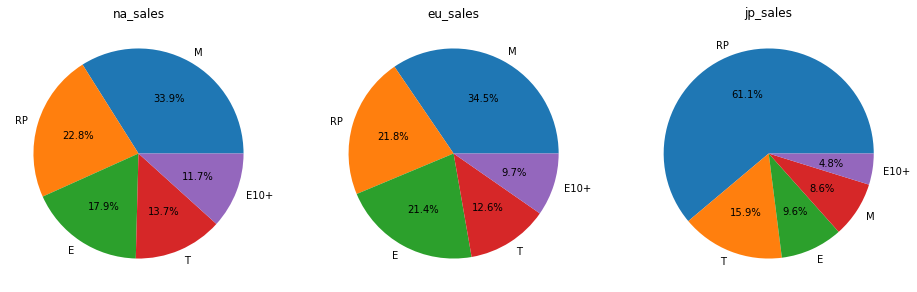

In [44]:
# строим график
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

x = [ax1, ax2, ax3]

for i in [0,1,2]:
    labels = esrb_dict[regions[i]].index
    sizes = esrb_dict[regions[i]].values
    ax = x[i]
    ax.set_title(regions[i])
    ax.pie(sizes, labels=labels, autopct='%1.1f%%') 

plt.show()

Очевидно влияние рейтинга ESRB на продажи по регионам: 

* Так, например, в Северной Америке и Европе самые популярные рейтинги, хоть и с небольшой разницей в процентном соотношении - `M` «Для взрослых», `RP` «Рейтинг ожидается», `E` «Для всех», `T` «Подросткам», `E10+` «Для всех от 10 лет и старше».
* Для Японии ситуация выглядит несколько иначе - `RP` «Рейтинг ожидается», `T` «Подросткам», `E` «Для всех», `M` «Для взрослых», `E10+` «Для всех от 10 лет и старше».

Из-за того, что мы брали данные за последние три года рейтинг `RP` сильно выбился вверх, особенно в Японии. В целом, если закрыть на это глаза, то можно сказать что, в Америке и Европе предпочитают более "взрослые" игры, в Японии - более "детские" игры. 

## Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:** средние пользовательские рейтинги платформы Xbox One и PC равны.

**Альтернативная гипотеза:** средние пользовательские рейтинги платформы Xbox One и PC отличаются.  

In [45]:
# зададим критический уровень статистической значимости равным 5%
alpha = 0.05

# подготовим выборки
df_xbox_one = actual_period[actual_period['platform']=='XOne']['user_score'].dropna()
df_pc = actual_period[actual_period['platform']=='PC']['user_score'].dropna()

Проверим дисперсии выборок для определения значения `equal_var`

In [46]:
# для Иксбокса 
np.var(df_xbox_one)

1.8795460055096425

In [47]:
# для ПК
np.var(df_pc)

2.8773743617307175

In [48]:
# значение equal_var установим False, так как выборки имеют различные дисперсии
results = st.ttest_ind(df_xbox_one, df_pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод**:

P-значение равно 11,6%, мы не можем отвергнуть нулевую гипотезу.

То есть, с вероятностью в 11,6% можно получить различные значения рейтингов двух платформ.

### Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action и Sports отличаются. 

In [49]:
# зададим критический уровень статистической значимости равным 5%
alpha = 0.05

# подготовим выборки
df_action = actual_period[actual_period['genre']=='Action']['user_score'].dropna()
df_sports = actual_period[actual_period['genre']=='Sports']['user_score'].dropna()

Проверим дисперсии выборок для определения значения `equal_var`

In [50]:
# для жанра Экшн
np.var(df_action)

1.89208448117539

In [51]:
# для жанра Спорт
np.var(df_sports)

3.4198375596751185

In [52]:
# значение equal_var установим False, так как выборки имеют различные дисперсии
results = st.ttest_ind(df_action, df_sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод**:

Получив p-value меньше 0.05, мы отвергли нулевую гипотезу.

Таким образом, вероятность получить одинаковые средние рейнтинги по двум жанрам практически нет.

## Общий вывод

Подведем итоги по проделанной работе.

**В ходе подготовки данных сделано**:
* Названия колонок приведены к единому регистру - нижнему 
* удалены пустые строки в столбцах `year_of_release` и `genre`
* расшифровано значение абривеатуры **TBD** в столбце `user_score`, при этом значения заменены на **NaN**
* заменены значения категории `K-A` и `EC` на `E` в столбце `rating`, а значения категории `AO` на `M`; пропущенные значения заполнены `RP`, как рейтинг неопределен
* добавлен столбец `total_sales` с суммами продажи во всех регионах

**В ходе исследовательского анализа выяснили, что**:
1. После 1995 года начался буйный рост выпуска игр, в связи с развитием игровой индустрии на консолях и персональных компьютерах. С 2008 года начался спад, скорее всего связано с переносом акцента на мобильные платформы
2. Средний срок жизни Ппатформы 10-11 лет. Появляются новые платформы в интервале от 1 до 5 лет.
3. Продажи по всем платформам падают со временем. PS4 и XOne до 2015 показывали рост продаж. Наиболее пепрспективными платформами отчасти можно считать PS4, XOne, 3DS. Так как они сохраняют достаточно высокий уровень продаж.
4. Для оценок пользователей Коэффициент Пирсона во всех трех случаях оказался примерно одинаковым  -0.07. Зависимости между продажами и оценками пользователей нет. А вот для оценок критиков Коэффициент ситуации отличаются. В отличии от PS4 и Xone, где показатели равны 0.4 и 0.43, что означает умеренную зависимость продаж от оценок критиков. То в ситуации с  персональном компьютером, Коэффициент Пирсона равен 0.17, значит зависимости между продажами и оценками критиков нет.
5. В топ-3 популярных жанров вырвались `Shooter`, `Sports` и `Platform` c перовначальных 5, 4 и 10 позиций, соответсвенно. В аутсайдерах на 11 месте как был `Strategy` так и осатлся. А вот `Adventure` с 3 позиции улетел аж на 12. Вот так поворот! Тот самый момент, когда качество оказывается выгоднее количества.

**Портрет пользователя каждого региона**:
* В Северной Америке, топ предпочтений у пользователей - это игры на платформе`PS4`, с жанром `Shooter` и рейтингом `M` «Для взрослых»
* В Европе, топ предпочтений у пользователей - это игры на платформе`PS4`, с жанром `Action` и рейтингом `M` «Для взрослых» 
* В Японии, топ предпочтений у пользователей - это игры `3DS`, с жанром `Role_Playing` и рейтингом `RP` «Рейтинг ожидается»

**В ходе проверки гипотез**:
1. **Cредние пользовательские рейтинги платформы Xbox One и PC равны.**

P-значение равно 11,6%, поэтому мы не можем отвергнуть нулевую гипотезу.
То есть, с вероятностью в 11,6% можно получить различные значения рейтингов двух платформ.

2. **Средние пользовательские рейтинги жанров Action и Sports равны.**

Получив p-value меньше 0.05, мы отвергли нулевую гипотезу.
Таким образом, вероятность получить одинаковые средние рейнтинги по двум жанрам практически нет.